In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from imblearn.combine import SMOTEENN


# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [5]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


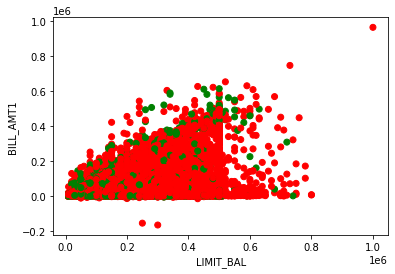

In [6]:
color=['green' if x==1 else 'red' for x in df['default.payment.next.month']]

plt.scatter(df["LIMIT_BAL"], df['BILL_AMT1'], c =color)
plt.xlabel('LIMIT_BAL')
plt.ylabel('BILL_AMT1')

plt.show()


Text(0, 0.5, 'PAY_1')

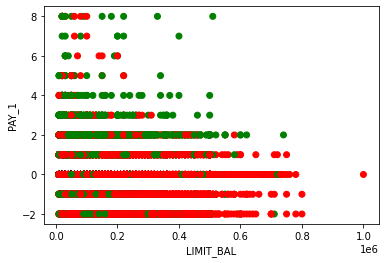

In [7]:
color=['green' if x==1 else 'red' for x in df['default.payment.next.month']]

plt.scatter(df["LIMIT_BAL"], df['PAY_0'], c =color)
plt.xlabel('LIMIT_BAL')
plt.ylabel('PAY_1')




In [8]:
summary_result=[]

In [9]:
df=df.rename(columns = {'PAY_0':'PAY_1'})

In [10]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [12]:
from scipy.stats import pearsonr

In [13]:
for eachValue in df.columns:    
    corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
    print('{0} : {1}'.format( eachValue, corr))

ID : -0.01395195483898623
LIMIT_BAL : -0.1535198763935075
SEX : -0.0399605777054416
EDUCATION : 0.02800607765624998
MARRIAGE : -0.024339215683403748
AGE : 0.013889834301963243
PAY_1 : 0.3247937284786222
PAY_2 : 0.26355120167216306
PAY_3 : 0.23525251372491646
PAY_4 : 0.2166136368424244
PAY_5 : 0.2041489138761648
PAY_6 : 0.1868663616535438
BILL_AMT1 : -0.019644197143221534
BILL_AMT2 : -0.014193218088215737
BILL_AMT3 : -0.014075518043214781
BILL_AMT4 : -0.010156495880289721
BILL_AMT5 : -0.006760463841014728
BILL_AMT6 : -0.0053723149148155016
PAY_AMT1 : -0.07292948777785141
PAY_AMT2 : -0.058578706582900986
PAY_AMT3 : -0.056250350990331204
PAY_AMT4 : -0.05682740089288779
PAY_AMT5 : -0.05512351562108832
PAY_AMT6 : -0.05318334032612812
default.payment.next.month : 1.0


# New features and feature engineering

In [14]:
df["EDUCATION_grad_school"] = 0
df["EDUCATION_university"] = 0
df["EDUCATION_high_school"] = 0
df["EDUCATION_others"] = 0
df["EDUCATION_ukn"] = 0
df.loc[df["EDUCATION"]==1,"EDUCATION_grad_school"] = 1
df.loc[df["EDUCATION"]==2,"EDUCATION_university"] = 1
df.loc[df["EDUCATION"]==3,"EDUCATION_high_school"] = 1
df.loc[df["EDUCATION"]==4,"EDUCATION_others"] = 1
df.loc[df["EDUCATION"]==5,"EDUCATION_ukn"] = 1
df.loc[df["EDUCATION"]==0,"EDUCATION_ukn"] = 1
df.loc[df["EDUCATION"]==6,"EDUCATION_ukn"] = 1

In [15]:
df["Relationship_Married"]=0
df["Relationship_Single"]=0
df["Relationship_Others"]=0
df.loc[df["MARRIAGE"]==1,"Relationship_Married"] = 1
df.loc[df["MARRIAGE"]==2,"Relationship_Single"] = 1
df.loc[df["MARRIAGE"]==3,"Relationship_Others"] = 1


In [16]:
df["PAY_1"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [17]:
def isduly(val):
    if val<=0:
        return 1
    else :
        return 0

In [18]:

for month in np.arange(1,7):
    pay_month="PAY_{0}".format(month)
    df[pay_month] =df[pay_month].apply(isduly)

In [19]:
df["AGE"].unique()


array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [20]:
def age_condition1(age):
    if age <40 and age >=30:
        return 1
    else :
        return 0

def age_condition2(age):
    if age <50 and age >=40:
        return 1
    else :
        return 0

def age_condition3(age):
    if age <60 and age >=50:
        return 1
    else :
        return 0


In [21]:
df["AGE_less_30"]=0
df["AGE_less_40"]=df['AGE'].apply( age_condition1)
df["Age_less_50"]=df['AGE'].apply(age_condition2)
df["AGE_less_60"]=df['AGE'].apply(age_condition3)
df["Age_greater_60"]=0
df.loc[df["AGE"]<30,"AGE_less_30"] = 1
# df.loc[df["AGE"]<40 & df["AGE"]>=30,"AGE_less_40"] = 1
# df.loc[df["AGE"]<50 & df["AGE"]>=40,"AGE_less_50"] = 1
# df.loc[df["AGE"]<60 & df["AGE"]>=50,"AGE_less_60"] = 1
df.loc[df["AGE"]>=60,"Age_greater_60"] = 1

In [22]:
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'default.payment.next.month'
]

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,0.772733,0.852067,0.859567,0.883000,0.901067,0.897367,0.221200
std,0.489129,0.790349,0.521970,0.419073,0.355040,0.347442,0.321426,0.298577,0.303484,0.415062
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Fixing marriage
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

# Fixing education
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267,0.772733,0.852067,0.859567,0.883000,0.901067,0.897367,0.221200
std,0.489129,0.744494,0.521405,0.419073,0.355040,0.347442,0.321426,0.298577,0.303484,0.415062
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
default_baseline = len(df[df['default.payment.next.month'] == 1]) / len(df) * 100

In [25]:
numerical_features = [
    'LIMIT_BAL', 
    'AGE', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]

df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [26]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_grad_school,EDUCATION_university,EDUCATION_high_school,EDUCATION_others,EDUCATION_ukn,Relationship_Married,Relationship_Single,Relationship_Others,AGE_less_30,AGE_less_40,Age_less_50,AGE_less_60,Age_greater_60
0,1,20000.0,2,2,1,24,0,0,1,1,1,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,2,120000.0,2,2,2,26,1,0,1,1,1,0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
2,3,90000.0,2,2,2,34,1,1,1,1,1,1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,4,50000.0,2,2,1,37,1,1,1,1,1,1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,50000.0,1,2,1,57,1,1,1,1,1,1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,1,1,1,1,1,1,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
29996,29997,150000.0,1,3,2,43,1,1,1,1,1,1,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
29997,29998,30000.0,1,2,2,37,0,0,0,1,1,1,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
29998,29999,80000.0,1,3,1,41,0,1,1,1,1,1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0


In [27]:
bill_columns = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
df[bill_columns]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


In [28]:

df['BUSTED_LIMIT'] = df.apply(lambda x: np.array([True if bill > x['LIMIT_BAL'] else False for bill in x[bill_columns]]).any(), axis=1)

In [29]:
# Payment-to-charge ratio
pay_amtcols = ['PAY_AMT{}'.format(x) for x in range(1,7)]
billcols = ['BILL_AMT{}'.format(x) for x in range(1,7)]

df_pmts = df[pay_amtcols]
df_bills = df[billcols]

pay_sums = df_pmts.sum(axis=1)
bill_sums = df_bills.sum(axis=1)

# To avoid division by 0
bill_sums[bill_sums == 0] = 1
pay_sums[bill_sums == 1] = 1

df['PAYMENT_TO_CHARGES_RATIO'] = pay_sums / bill_sums
numerical_features.append('PAYMENT_TO_CHARGES_RATIO')

In [30]:
# Bill_to_balance ratio
bill_avgs = df_bills.mean(axis=1)

df['BILL_TO_BALANCE'] = bill_avgs / df['LIMIT_BAL']
numerical_features.append('BILL_TO_BALANCE')

In [31]:
paycols = ['PAY_{}'.format(x) for x in range(1,7)]
paycols_df = df[paycols]
for PAY_X in paycols:
  paycols_df[PAY_X] = paycols_df[PAY_X].apply(lambda x: 1 if x in [-2, -1, 0] else 0)
df['TOTAL_PAID_ON_TIME'] = paycols_df.sum(axis=1)
numerical_features.append('TOTAL_PAID_ON_TIME')

<ipython-input-31-0b42238deada>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paycols_df[PAY_X] = paycols_df[PAY_X].apply(lambda x: 1 if x in [-2, -1, 0] else 0)


TOTAL_PAID_ON_TIME   
0                   1    11.710401
1                   1    29.823769
2                   1    38.757241
3                   1    50.866551
4                   1    57.308097
5                   1    57.382550
6                   1    70.320656
Name: default.payment.next.month, dtype: float64


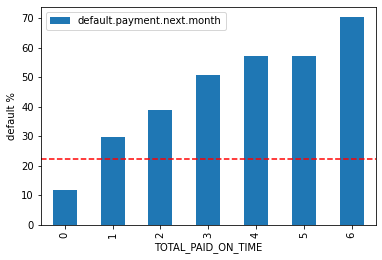

In [32]:
val_counts = df.groupby('TOTAL_PAID_ON_TIME')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');

In [33]:
# The last bill to balance ratio might be interesting since it's the last before prediction.
df['LAST_BILL_TO_BALANCE'] = df['BILL_AMT1'] / df['LIMIT_BAL']
numerical_features.append('LAST_BILL_TO_BALANCE')

In [34]:
# 3 months average bill
three_months_bill_average = df[billcols[::-1]].rolling(3, axis=1, min_periods=1).mean()

bill_avg_cols_names = {}
for col_name in billcols:
  bill_avg_cols_names[col_name] = col_name + '_3m_avg'

three_months_bill_average = three_months_bill_average.rename(columns=bill_avg_cols_names)
three_months_bill_average = three_months_bill_average[three_months_bill_average.columns[::-1]] 
df = pd.concat([df, three_months_bill_average], axis=1)

In [35]:
# 3 months average payment to bill ratio
# Creating the average pay columns
three_months_pay_average = df[pay_amtcols[::-1]].rolling(3, axis=1, min_periods=1).mean()

pay_avg_cols_names = {}
for col_name in pay_amtcols:
  pay_avg_cols_names[col_name] = col_name + '_3m_avg'

three_months_pay_average = three_months_pay_average.rename(columns=pay_avg_cols_names)
three_months_pay_average = three_months_pay_average[three_months_pay_average.columns[::-1]] 
df = pd.concat([df, three_months_pay_average], axis=1)

In [36]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_grad_school,EDUCATION_university,EDUCATION_high_school,EDUCATION_others,EDUCATION_ukn,Relationship_Married,Relationship_Single,Relationship_Others,AGE_less_30,AGE_less_40,Age_less_50,AGE_less_60,Age_greater_60,BUSTED_LIMIT,PAYMENT_TO_CHARGES_RATIO,BILL_TO_BALANCE,TOTAL_PAID_ON_TIME,LAST_BILL_TO_BALANCE,BILL_AMT1_3m_avg,BILL_AMT2_3m_avg,BILL_AMT3_3m_avg,BILL_AMT4_3m_avg,BILL_AMT5_3m_avg,BILL_AMT6_3m_avg,PAY_AMT1_3m_avg,PAY_AMT2_3m_avg,PAY_AMT3_3m_avg,PAY_AMT4_3m_avg,PAY_AMT5_3m_avg,PAY_AMT6_3m_avg
0,1,20000.0,2,2,1,24,0,0,1,1,1,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,False,0.089434,0.064200,2,0.195650,2568.000000,1263.666667,229.666667,0.000000,0.0,0.0,229.666667,229.666667,0.000000,0.000000,0.0,0.0
1,2,120000.0,2,2,2,26,1,0,1,1,1,0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,False,0.292791,0.023718,2,0.022350,2363.000000,2559.666667,3136.333333,3329.333333,3358.0,3261.0,666.666667,1000.000000,666.666667,1000.000000,1000.0,2000.0
2,3,90000.0,2,2,2,34,1,1,1,1,1,1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,False,0.108388,0.188246,0,0.324878,18941.666667,13972.333333,14279.333333,14942.666667,15248.5,15549.0,1339.333333,1166.666667,1000.000000,2333.333333,3000.0,5000.0
3,4,50000.0,2,2,1,37,1,1,1,1,1,1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,False,0.036259,0.771113,0,0.939800,48171.333333,41946.000000,35521.333333,28940.000000,29253.0,29547.0,1739.666667,1439.666667,1123.000000,1056.333333,1034.5,1000.0
4,5,50000.0,1,2,1,57,1,1,1,1,1,1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,False,0.540054,0.364463,0,0.172340,16707.333333,20815.000000,25307.000000,19739.000000,19138.5,19131.0,16227.000000,18560.333333,6563.000000,3456.000000,684.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,1,1,1,1,1,1,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,False,0.058661,0.549507,0,0.858855,196709.333333,163061.333333,109202.000000,45073.666667,23608.5,15980.0,11167.666667,9350.000000,4350.000000,3015.666667,3000.0,1000.0
29996,29997,150000.0,1,3,2,43,1,1,1,1,1,1,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,False,0.684071,0.023536,0,0.011220,2337.666667,4769.666667,5890.333333,4723.000000,2595.0,0.0,4787.000000,4217.666667,3042.333333,43.000000,0.0,0.0
29997,29998,30000.0,1,2,2,37,0,0,0,1,1,1,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,False,0.443997,0.391644,3,0.118833,3226.333333,8997.333333,14739.333333,20272.333333,19969.5,19357.0,7333.333333,8733.333333,9400.000000,3100.000000,2550.0,3100.0
29998,29999,80000.0,1,3,1,41,0,1,1,1,1,1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,False,0.552044,0.555440,1,-0.020563,51012.666667,69152.333333,46977.666667,37857.666667,30399.5,48944.0,30162.333333,2171.000000,18689.333333,18898.000000,27384.0,1804.0


In [37]:
df['payment_score']=df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['bill_amt_score'] =df['payment_score']*df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [38]:
df.apply(lambda x:sum(x.isnull()))

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
EDUCATION_grad_school         0
EDUCATION_university          0
EDUCATION_high_school         0
EDUCATION_others              0
EDUCATION_ukn                 0
Relationship_Married          0
Relation

In [39]:
len(df.columns)

57

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,3.000000e+04
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733,0.489129,1.000000,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.842267,0.744494,1.000000,1.000000,2.000000,2.000000,4.000000e+00
MARRIAGE,30000.0,1.557267,0.521405,1.000000,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
PAY_1,30000.0,0.772733,0.419073,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_2,30000.0,0.852067,0.355040,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_3,30000.0,0.859567,0.347442,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_4,30000.0,0.883000,0.321426,0.000000,1.000000,1.000000,1.000000,1.000000e+00


In [41]:
df=df.drop('ID', axis=1)
df=df.drop('SEX', axis=1)
df=df.drop('EDUCATION', axis=1)
df=df.drop('MARRIAGE', axis=1)
df=df.drop('AGE', axis=1)


In [42]:
# df=df.drop('PAY_1', axis=1)
# df=df.drop('PAY_2', axis=1)
# df=df.drop('PAY_3', axis=1)
# df=df.drop('PAY_4', axis=1)
# df=df.drop('PAY_5', axis=1)
# df=df.drop('PAY_6', axis=1)

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
PAY_1,30000.0,0.772733,0.419073,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_2,30000.0,0.852067,0.355040,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_3,30000.0,0.859567,0.347442,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_4,30000.0,0.883000,0.321426,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_5,30000.0,0.901067,0.298577,0.000000,1.000000,1.000000,1.000000,1.000000e+00
PAY_6,30000.0,0.897367,0.303484,0.000000,1.000000,1.000000,1.000000,1.000000e+00
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.000000,3558.750000,22381.500000,67091.000000,9.645110e+05
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.000000,2984.750000,21200.000000,64006.250000,9.839310e+05
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.000000,2666.250000,20088.500000,60164.750000,1.664089e+06


# Data Processing and Normalization

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df = pd.DataFrame(data=scaled_features, columns= df.columns.values)

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,0.159075,0.131058,0.0,0.040404,0.131313,0.232323,1.0
PAY_1,30000.0,0.772733,0.419073,0.0,1.000000,1.000000,1.000000,1.0
PAY_2,30000.0,0.852067,0.355040,0.0,1.000000,1.000000,1.000000,1.0
PAY_3,30000.0,0.859567,0.347442,0.0,1.000000,1.000000,1.000000,1.0
PAY_4,30000.0,0.883000,0.321426,0.0,1.000000,1.000000,1.000000,1.0
PAY_5,30000.0,0.901067,0.298577,0.0,1.000000,1.000000,1.000000,1.0
PAY_6,30000.0,0.897367,0.303484,0.0,1.000000,1.000000,1.000000,1.0
BILL_AMT1,30000.0,0.191846,0.065159,0.0,0.149668,0.166324,0.205887,1.0
BILL_AMT2,30000.0,0.112893,0.067546,0.0,0.069053,0.086340,0.126964,1.0
BILL_AMT3,30000.0,0.112157,0.038076,0.0,0.087808,0.097374,0.119378,1.0


In [47]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

In [48]:
# y=df['default.payment.next.month']
# X=df.drop('default.payment.next.month', axis=1)

In [49]:
# uni = SelectKBest(score_func = f_classif, k >=0)
# fit = uni.fit(X, y)

In [50]:
# X.columns[fit.get_support(indices=True)].tolist()

In [51]:
from scipy.stats import pearsonr

In [52]:
for eachValue in df.columns:    
    corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
    print('{0} : {1}'.format( eachValue, corr))

LIMIT_BAL : -0.15351987639350745
PAY_1 : -0.368116995891848
PAY_2 : -0.33802232500726026
PAY_3 : -0.2935830035835144
PAY_4 : -0.2754946639376187
PAY_5 : -0.26695895477560927
PAY_6 : -0.2460889116609163
BILL_AMT1 : -0.019644197143221492
BILL_AMT2 : -0.014193218088215737
BILL_AMT3 : -0.014075518043214798
BILL_AMT4 : -0.01015649588028973
BILL_AMT5 : -0.006760463841014754
BILL_AMT6 : -0.0053723149148155154
PAY_AMT1 : -0.07292948777785141
PAY_AMT2 : -0.058578706582900986
PAY_AMT3 : -0.056250350990331204
PAY_AMT4 : -0.056827400892887785
PAY_AMT5 : -0.05512351562108832
PAY_AMT6 : -0.05318334032612812
default.payment.next.month : 1.0
EDUCATION_grad_school : -0.05132774863874108
EDUCATION_university : 0.03646733925077122
EDUCATION_high_school : 0.03240318989212792
EDUCATION_others : -0.02539733541693118
EDUCATION_ukn : -0.03789874257654104
Relationship_Married : 0.02977461041246711
Relationship_Single : -0.030619384748382626
Relationship_Others : 0.009768097322225142
AGE_less_30 : 0.01195923744

In [53]:
correlated_data=df.copy()

for eachValue in df.columns:    
    corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
    if corr < 0:
        correlated_data=correlated_data.drop(columns=eachValue,  axis=1)

# y_original=correlated_data['default.payment.next.month']
# X_original=correlated_data.drop('default.payment.next.month', axis=1)
# X, x_test, y,y_test=train_test_split(X_original,y_original,test_size=0.2, randome_state=42)
# test_df=x_test
# test_df['default.payment.next.month']=y_test

# new_df=X
# new_df['default.payment.next.month']=y

# test_df=test_df.sample(frac=1).reset_index(drop=True)
# new_df=new_df.sample(frac=1).reset_index(drop=True)

# test_df['default.payment.next.month'].value_counts()
# X = new_df.drop('default.payment.next.month',axis=1)
# y = new_df['default.payment.next.month']

# new_df['default.payment.next.month'].value_counts()
df=correlated_data
    

In [54]:
new_df=df.copy()

# balancing

In [55]:
df_smote=df.copy()
y = df_smote["default.payment.next.month"]
X = df_smote.drop("default.payment.next.month", axis=1)
sm  = SMOTEENN(random_state = 1)
X_res, y_res = sm.fit_resample(X, y)
df_balanced=X_res
df_balanced['default.payment.next.month']=y_res

In [56]:
df_balanced['default.payment.next.month'].value_counts()
new_df = df_balanced.copy()


In [57]:
df_balanced['default.payment.next.month'].value_counts()

1.0    11981
0.0    11010
Name: default.payment.next.month, dtype: int64

In [58]:
y_original=new_df['default.payment.next.month']
X_original=new_df.drop('default.payment.next.month', axis=1)

In [59]:
X, x_test, y,y_test=train_test_split(X_original,y_original,test_size=0.2, random_state=42)

In [60]:
test_df=x_test
test_df['default.payment.next.month']=y_test

new_df=X
new_df['default.payment.next.month']=y

test_df=test_df.sample(frac=1).reset_index(drop=True)
new_df=new_df.sample(frac=1).reset_index(drop=True)

test_df['default.payment.next.month'].value_counts()
X = new_df.drop('default.payment.next.month',axis=1)
y = new_df['default.payment.next.month']

new_df['default.payment.next.month'].value_counts()

1.0    9555
0.0    8837
Name: default.payment.next.month, dtype: int64

In [61]:
X_test = test_df.drop('default.payment.next.month',axis=1)
y_test = test_df['default.payment.next.month']

# dataset shrinking... 

In [62]:
df

,default.payment.next.month,EDUCATION_university,EDUCATION_high_school,Relationship_Married,Relationship_Others,AGE_less_30,Age_less_50,AGE_less_60,Age_greater_60,BUSTED_LIMIT,BILL_TO_BALANCE,TOTAL_PAID_ON_TIME,LAST_BILL_TO_BALANCE
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.053028,0.333333,0.115268
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.045795,0.333333,0.090774
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075191,0.000000,0.133533
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179332,0.000000,0.220445
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.106676,0.000000,0.111973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139738,0.000000,0.209004
29996,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.045762,0.000000,0.089201
29997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111532,0.500000,0.104411
29998,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.140798,0.166667,0.084709


In [63]:
correlated_data=df.copy()

for eachValue in df.columns:    
    corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
    if corr < 0:
        correlated_data=correlated_data.drop(columns=eachValue,  axis=1)

df=correlated_data
    

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
n_splits=5
kf=KFold(n_splits=n_splits, random_state=None, shuffle=False)

In [66]:
def k_fold_cross_validated_score(model,X,y):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    scores=cross_val_score(model, X, y, cv=10 )
    best_accuracy=scores.max()
    average_accuracy=scores.mean()
    return best_model, best_accuracy, average_accuracy

# Logistic Regression

In [67]:
model=LogisticRegression()

In [68]:
k_fold_cross_validated_score(model, X, y)

('', 0.8603260869565217, 0.8497170603116061)

In [69]:
def k_fold_cross_validated_result(model):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    acc_score=[]
    
    for train_index, test_index in kf.split(X):
        x_train, x_heldout=X.iloc[train_index, : ], X.iloc[test_index, :]
        y_train, y_heldout=y[train_index], y[test_index]
        model.fit(x_train, y_train)
        pred_values = model.predict(x_heldout)
        
        acc = accuracy_score(pred_values, y_heldout)
        if acc > best_accuracy:
            best_accuracy=acc
            best_model=model
        acc_score.append(acc)
    average_accuracy=sum(acc_score)/len(acc_score)

    return best_model, best_accuracy, average_accuracy

In [70]:
m, best_acc, avg_acc=k_fold_cross_validated_result(model)

print('Model : {0}, best Accuracy : {1}, Average Accuracy : {2}'.format(m, best_acc, avg_acc))

Model : LogisticRegression(), best Accuracy : 0.8559391138896439, Average Accuracy : 0.8498256273093574


In [71]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8498256273093574, training best accuracy: 0.8559391138896439,  test accuracy : 0.8484453141987388 


In [72]:
from sklearn.metrics import roc_curve, auc

In [73]:
def isAvailableToadd(item , list):
    flag=False 
    if len(list)==0:
        return flag

    for ele in list:
        if ele['model']==item['model']:
            flag=True 
    return flag


In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Logistic Regression',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
}

if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

In [75]:
#sdadadad=aasa

# Linear Perceptron

In [76]:
from sklearn.linear_model import Perceptron
model=Perceptron()
m, best_acc, avg_acc= k_fold_cross_validated_result(model)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Linear Perceptron',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
 }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

training average accuracy: 0.8056209419273536, training best accuracy: 0.8249524327262843,  test accuracy : 0.7625570776255708 


In [77]:
summary_result

[{'model': 'Logistic Regression',
  'false_positive_rate': array([0.        , 0.20667727, 1.        ]),
  'true_positive_rate': array([0.       , 0.9150264, 1.       ]),
  'roc_auc': 0.8541745693619405,
  'best_train_accuracy': 0.8559391138896439,
  'average_train_accuracy': 0.8498256273093574,
  'test_accuracy': 0.8484453141987388},
 {'model': 'Linear Perceptron',
  'false_positive_rate': array([0.        , 0.28695309, 1.        ]),
  'true_positive_rate': array([0.        , 0.82347236, 1.        ]),
  'roc_auc': 0.7682596313646299,
  'best_train_accuracy': 0.8249524327262843,
  'average_train_accuracy': 0.8056209419273536,
  'test_accuracy': 0.7625570776255708}]

# Support Vector Machine

In [78]:
from sklearn.svm import SVC 

In [79]:
X_train_support,X_test_support,y_train_support,y_test_support = train_test_split(X,y,train_size=0.85,random_state=42)

In [80]:
c = [0.01, 0.1, 1, 2, 3, 5]
kernel_func=['linear', 'poly', 'rbf']

for k in kernel_func:
    for cost_c in c:
        model=SVC(C=cost_c, kernel=k)
        model.fit(X_train_support,y_train_support)
        y_pred=model.predict(X_test_support)
        print("kernel : {0}, C: {1}, Accuracy: {2}".format(k, cost_c, accuracy_score(y_pred,y_test_support)))

kernel : linear, C: 0.01, Accuracy: 0.8126132656759696
kernel : linear, C: 0.1, Accuracy: 0.8528452337803551
kernel : linear, C: 1, Accuracy: 0.8535701341065604
kernel : linear, C: 2, Accuracy: 0.8535701341065604
kernel : linear, C: 3, Accuracy: 0.8535701341065604
kernel : linear, C: 5, Accuracy: 0.8535701341065604
kernel : poly, C: 0.01, Accuracy: 0.7774555998550199
kernel : poly, C: 0.1, Accuracy: 0.8300108735048931
kernel : poly, C: 1, Accuracy: 0.8441464298658934
kernel : poly, C: 2, Accuracy: 0.8484958318231243
kernel : poly, C: 3, Accuracy: 0.8488582819862269
kernel : poly, C: 5, Accuracy: 0.8484958318231243
kernel : rbf, C: 0.01, Accuracy: 0.8100761145342515
kernel : rbf, C: 0.1, Accuracy: 0.83943457774556
kernel : rbf, C: 1, Accuracy: 0.857194635737586
kernel : rbf, C: 2, Accuracy: 0.8564697354113809
kernel : rbf, C: 3, Accuracy: 0.8561072852482784
kernel : rbf, C: 5, Accuracy: 0.8561072852482784


In [81]:
model=SVC(C=5, kernel='rbf')


m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)

0.8689861375373743


In [82]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8615153005292445, training best accuracy: 0.8689861375373743,  test accuracy : 0.857577734290063 


In [83]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Support Vector machine',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# Decision Tree

In [84]:
from sklearn import tree

In [85]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_support, y_train_support)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

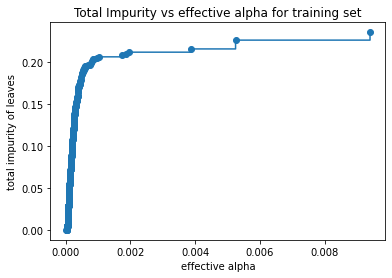

In [86]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [87]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_support, y_train_support)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.26349902349164955


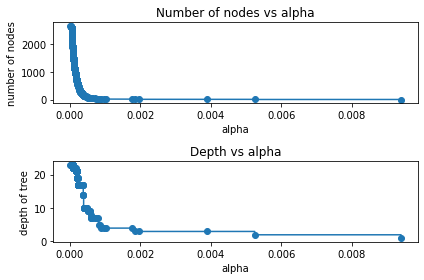

In [88]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

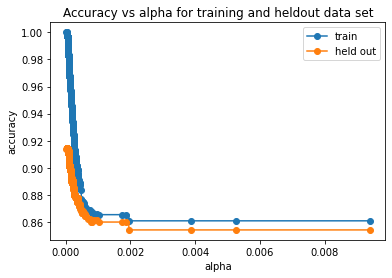

In [89]:
train_scores = [clf.score(X_train_support, y_train_support) for clf in clfs]
test_scores = [clf.score(X_test_support, y_test_support) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and heldout data set")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="held out", drawstyle="steps-post")
ax.legend()
plt.show()

In [90]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train_support, y_train_support))
print('Test accuracy of best model: ',best_model.score(X_test_support, y_test_support))

Training accuracy of best model:  0.998784622273396
Test accuracy of best model:  0.9148242116708952


In [91]:
model=best_model
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
print(model.ccp_alpha)

0.9265905383360522
4.908507252450009e-05


In [92]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.9195301552053667, training best accuracy: 0.9265905383360522,  test accuracy : 0.913894324853229 


In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Decision Tree',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):    
    summary_result.append(item)

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
min_error=1
error_rate = []
for n_estmtrs in range(1,70,5):
    for dep in range(1,15):
        rf = RandomForestClassifier(n_estimators=n_estmtrs, max_depth=dep)
        rf.fit(X_train_support,y_train_support)
        pred_i = rf.predict(X_test_support)
        error=np.mean(pred_i != y_test_support)
        error_rate.append(error)
        if min_error> error:
            min_error=error

        if error == min_error :
            print("n_estmtrs: {0}, depth : {1}, error: {2} ".format(n_estmtrs, dep, min_error))

print(min_error)

n_estmtrs: 1, depth : 1, error: 0.1457049655672345 
n_estmtrs: 1, depth : 6, error: 0.13990576295759333 
n_estmtrs: 1, depth : 9, error: 0.130844508880029 
n_estmtrs: 1, depth : 11, error: 0.12323305545487495 
n_estmtrs: 1, depth : 12, error: 0.11888365349764407 
n_estmtrs: 1, depth : 14, error: 0.11417180137731062 
n_estmtrs: 6, depth : 9, error: 0.10801014860456687 
n_estmtrs: 6, depth : 10, error: 0.10366074664733599 
n_estmtrs: 6, depth : 11, error: 0.09931134469010511 
n_estmtrs: 6, depth : 12, error: 0.08227618702428416 
n_estmtrs: 6, depth : 13, error: 0.07937658571946357 
n_estmtrs: 6, depth : 14, error: 0.07321493294671982 
n_estmtrs: 11, depth : 13, error: 0.07104023196810438 
n_estmtrs: 11, depth : 14, error: 0.06596592968466836 
n_estmtrs: 16, depth : 14, error: 0.06596592968466836 
n_estmtrs: 21, depth : 14, error: 0.06596592968466836 
n_estmtrs: 31, depth : 14, error: 0.06487857919536064 
n_estmtrs: 36, depth : 14, error: 0.06379122870605292 


In [ ]:
print(len(error_rate))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(0,len(error_rate)),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
min_value=min(error_rate)
print(min_value)
k=0
for val in error_rate:
    if val!=min_value:
        k=k+1
    else:
        break

print("K :" + str(k))

        

In [ ]:
model=RandomForestClassifier(n_estimators=k, max_depth=14)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Random Forest',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# K nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_support,y_train_support)
    pred_i = knn.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
model=KNeighborsClassifier(n_neighbors=31)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Knn',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):  
    summary_result.append(item)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Naive Bayes',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [ ]:

model=QDA().fit(X,y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'QDA',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# error_rate=[]
# for num_samples in range(1,100):
#     model= AdaBoostClassifier(n_estimators=num_samples, random_state=0)
#     model.fit(X, y)
#     score=model.score(X, y)
#     pred_i = model.predict(X_test_support)
#     error_rate.append(np.mean(pred_i != y_test_support))
#     print('number of samples: {0}, accuracy : {1}'.format(num_samples, score))

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. n_estimators')
# plt.xlabel('n_estimators')
# plt.ylabel('Error Rate')

In [115]:
model= AdaBoostClassifier(n_estimators=90, random_state=42).fit(X, y)

m, best_acc, avg_acc=k_fold_cross_validated_score(model, X, y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8641254698914818, training best accuracy: 0.8739130434782608,  test accuracy : 0.8638834529245488 


In [116]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'AdaBoost',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# MLP

In [117]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# error_rate=[]
# for num_iter in range(1,120):
#     model= MLPClassifier(random_state=1, max_iter=num_iter)
#     model.fit(X, y)
#     score=model.score(X, y)
#     pred_i = model.predict(X_test_support)
#     error_rate.append(np.mean(pred_i != y_test_support))
#     if num_iter % 30 ==0:
#         print('number of iterations: {0}, accuracy : {1}'.format(num_iter, score))

In [119]:
model= MLPClassifier(max_iter=120, random_state=1)
model.fit(X, y)
m, best_acc, avg_acc=k_fold_cross_validated_score(model, X, y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

training average accuracy: 0.8623309277253707, training best accuracy: 0.875,  test accuracy : 0.8608393128941074 


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'MLPClassifier',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# XGBoost

In [ ]:
x_test=x_test.drop('default.payment.next.month', axis=1)

In [ ]:

import xgboost
from xgboost import XGBClassifier


In [123]:
# params = {
#     'objective': ['binary:logistic'],
#     'max_depth': [3, 5, 6, 10, 20,30],
#     'n_estimators': [50, 100, 150, 200, 300],
#     'scale_pos_weight': [5, 10, 15],
#     'learning_rate': [0.1, 0.01], 

# }

# grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=params, n_jobs=1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])
# grid_search.fit(X, y)
# clf = grid_search.best_estimator_.fit(X, y)
# print(grid_search.best_params_)
# y_pred = clf.predict(x_test)
# print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
# print('f1: {:.4f}'.format(f1_score(y_test, y_pred)))

In [124]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 30,
    'n_estimators': 100,
    'scale_pos_weight': 5, 
    'learning_rate':0.1
    
}
model=XGBClassifier(objective='binary:logistic', max_depth=20, n_estimators=100, learning_rate=0.01)

model.fit(X, y)

y_pred = model.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
avg_acc=accuracy_score(y_test, y_pred)
best_acc=accuracy_score(y_test, y_pred)
print('f1: {:.4f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.9228
f1: 0.9268


In [125]:

accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.9228093063709502, training best accuracy: 0.9228093063709502,  test accuracy : 0.9228093063709502 


In [126]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'XGBClassifier',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# ROC CURVE

In [127]:
for result in summary_result:
    print('Model:{0}, Traning Accuracy= {1}, Test Accuracy= {2}'.format(
        result['model'], result['average_train_accuracy'], result['test_accuracy'] ))

Model:Logistic Regression, Traning Accuracy= 0.8498256273093574, Test Accuracy= 0.8484453141987388
Model:Linear Perceptron, Traning Accuracy= 0.8056209419273536, Test Accuracy= 0.7625570776255708
Model:Support Vector machine, Traning Accuracy= 0.8615153005292445, Test Accuracy= 0.857577734290063
Model:Decision Tree, Traning Accuracy= 0.9195301552053667, Test Accuracy= 0.913894324853229
Model:Random Forest, Traning Accuracy= 0.9398649744201656, Test Accuracy= 0.9382474450967602
Model:Knn, Traning Accuracy= 0.861624247433481, Test Accuracy= 0.8621439443357252
Model:Naive Bayes, Traning Accuracy= 0.801978943435258, Test Accuracy= 0.8016960208741031
Model:QDA, Traning Accuracy= 0.801978943435258, Test Accuracy= 0.8106110023918243
Model:AdaBoost, Traning Accuracy= 0.8641254698914818, Test Accuracy= 0.8638834529245488
Model:MLPClassifier, Traning Accuracy= 0.8623309277253707, Test Accuracy= 0.8608393128941074
Model:XGBClassifier, Traning Accuracy= 0.9228093063709502, Test Accuracy= 0.9228093

Text(0.5, 0, 'False Positive Rate')

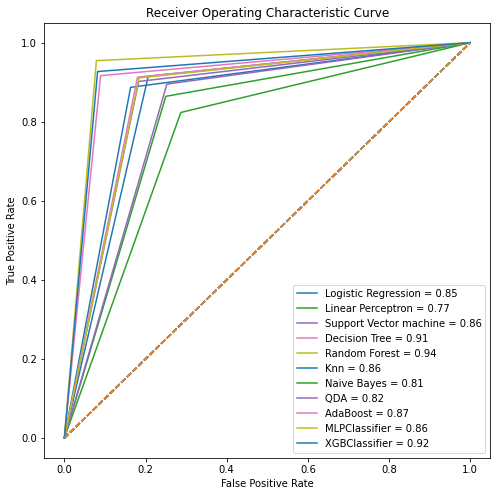

Text(0.5, 0, 'False Positive Rate')

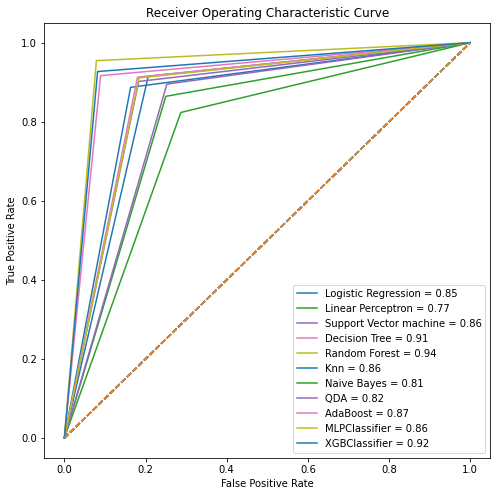

In [128]:
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic Curve')

for result in summary_result:
    plt.plot(result['false_positive_rate'],result['true_positive_rate'],label =result['model'] +' = %0.2f' % result['roc_auc'])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
